<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
# Identify columns with missing values
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing Values Before Handling:")
print(missing_values)


Missing Values Before Handling:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [5]:
mode_job_sat = df['JobSat'].mode()[0]  # Get the first mode in case of ties
df['JobSat'].fillna(mode_job_sat, inplace=True)

# RemoteWork: Fill missing values with the mode (categorical column)
mode_remote_work = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(mode_remote_work, inplace=True)

/tmp/ipykernel_1633/1497907500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(mode_job_sat, inplace=True)
/tmp/ipykernel_1633/1497907500.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [6]:
missing_values_after = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)


Missing Values After Handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [7]:
# Convert 'YearsCodePro' to numeric, handling errors
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where 'YearsCodePro' is NaN after conversion
df.dropna(subset=['YearsCodePro'], inplace=True)

# Define the bins and labels for experience levels
bins = [0, 5, 10, 20, float('inf')]  # 0-2, 2-5, 5-10, 10+
labels = ['Junior', 'Intermediate', 'Senior', 'Expert']

# Create the 'ExperienceLevel' column using pd.cut()
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Print the first few rows of the DataFrame with the new column
print(df[['YearsCodePro', 'ExperienceLevel']].head())

# Print the value counts of each experience level
print("\nValue counts for ExperienceLevel:")
print(df['ExperienceLevel'].value_counts())

    YearsCodePro ExperienceLevel
1           17.0          Senior
2           27.0          Expert
6            7.0    Intermediate
9           11.0          Senior
11          25.0          Expert

Value counts for ExperienceLevel:
ExperienceLevel
Junior          14115
Senior          13327
Intermediate    12928
Expert           8334
Name: count, dtype: int64


In [8]:
median_job_sat_by_experience = df.groupby('ExperienceLevel')['JobSat'].median()

# 2. Print the summary
print("\nMedian Job Satisfaction by Experience Level:")
print(median_job_sat_by_experience)


Median Job Satisfaction by Experience Level:
ExperienceLevel
Junior          8.0
Intermediate    8.0
Senior          8.0
Expert          8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_1633/3420455134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat_by_experience = df.groupby('ExperienceLevel')['JobSat'].median()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


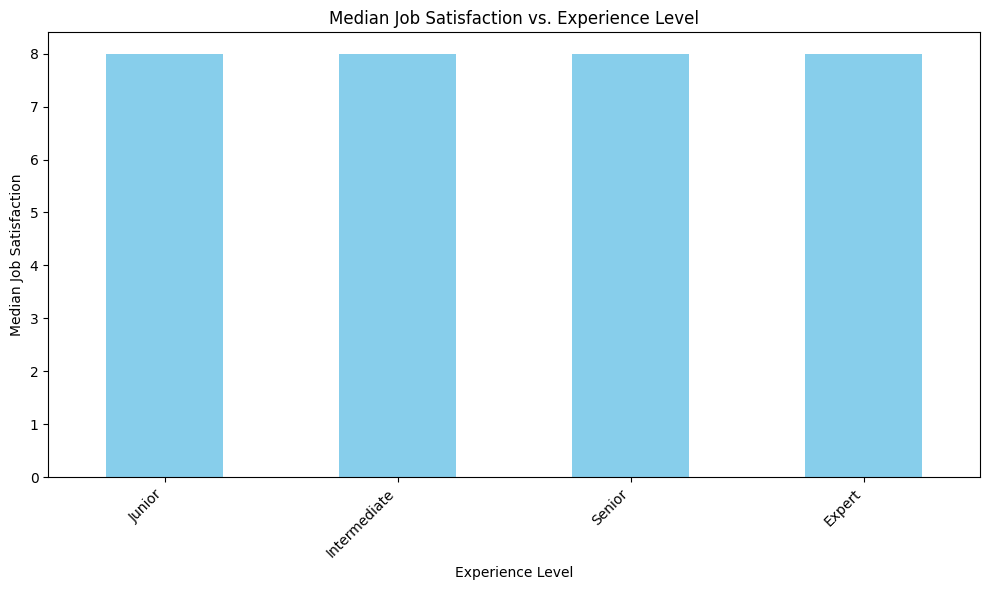

In [9]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
median_job_sat_by_experience.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_1633/1288633301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis')


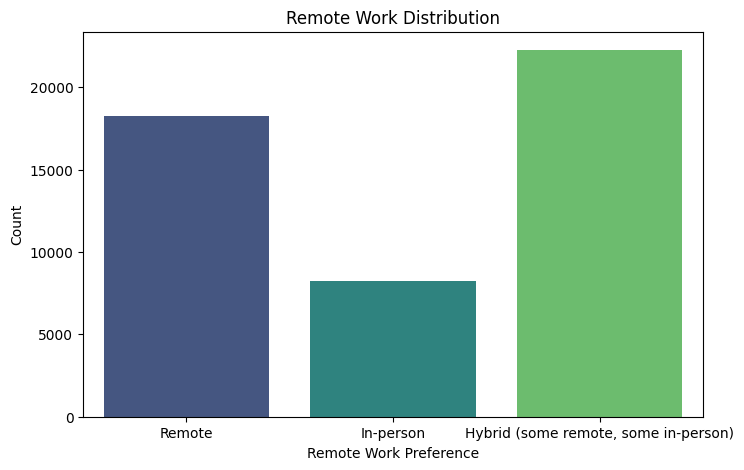

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RemoteWork', data=df, palette='viridis')
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.show()

In [11]:
# 2. Cross-tabulate RemoteWork preferences by Employment type
print("\nCross-tabulation of Remote Work Preference by Employment Type:")
employment_remote_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])
print(employment_remote_crosstab)


Cross-tabulation of Remote Work Preference by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                15178   
Employed, full-time;Employed, part-time                                               72   
Employed, full-time;Independent contractor, fre...                                  1175   
Employed, full-time;Independent contractor, fre...                                    67   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     2   
Student, full-time;Student, part-time;Retired                                          1   
Student, part-ti

In [12]:
# 3. Cross-tabulate RemoteWork preferences by ExperienceLevel.
print("\nCross-tabulation of Remote Work Preference by Experience Level:")
experience_remote_crosstab = pd.crosstab(df['ExperienceLevel'], df['RemoteWork'])
print(experience_remote_crosstab)


Cross-tabulation of Remote Work Preference by Experience Level:
RemoteWork       Hybrid (some remote, some in-person)  In-person  Remote
ExperienceLevel                                                         
Junior                                           6802       3545    3768
Intermediate                                     6052       1999    4877
Senior                                           5794       1625    5908
Expert                                           3613       1043    3678


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [13]:
# --- Language Usage Analysis by Region ---

# 1. Check if the columns exist
if 'LanguageHaveWorkedWith' not in df.columns or 'Country' not in df.columns:
    raise KeyError("Columns 'LanguageHaveWorkedWith' or 'Country' not found in DataFrame.")

# 2. Function to get the top languages for a given dataframe
def get_top_languages(df_region, num_languages=5):
    """
    Get the top programming languages from the 'LanguageHaveWorkedWith' column
    for a given DataFrame, representing a specific region.

    Args:
        df_region (pd.DataFrame): DataFrame containing data for a specific region.
        num_languages (int, optional): Number of top languages to return. Defaults to 5.

    Returns:
        pd.Series: A Series containing the top languages and their counts.
                  Returns None if the input DataFrame is empty or
                  'LanguageHaveWorkedWith' column is missing.
    """
    if df_region.empty or 'LanguageHaveWorkedWith' not in df_region.columns:
        return None

    # Split the string of languages into a list and count occurrences
    language_counts = df_region['LanguageHaveWorkedWith'].astype(str).str.split(';', expand=True).stack().value_counts()
    return language_counts.head(num_languages)



# 3. Get all unique countries
countries = df['Country'].unique()

# 4. Create a dictionary to store the top languages for each country
top_languages_by_country = {}

# 5. Iterate through each country and get the top languages
for country in countries:
    country_df = df[df['Country'] == country]
    top_languages = get_top_languages(country_df)
    if top_languages is not None:
        top_languages_by_country[country] = top_languages

# 6. Print the top languages for each country
print("\nTop Programming Languages by Country/Region:")
for country, languages in top_languages_by_country.items():
    print(f"\n{country}:")
    print(languages)


Top Programming Languages by Country/Region:

United Kingdom of Great Britain and Northern Ireland:
JavaScript    1709
SQL           1457
HTML/CSS      1404
Python        1280
TypeScript    1051
Name: count, dtype: int64

United States of America:
JavaScript                 5725
SQL                        5138
Python                     5067
HTML/CSS                   4684
Bash/Shell (all shells)    4080
Name: count, dtype: int64

Serbia:
JavaScript    143
SQL           127
HTML/CSS      116
TypeScript    102
Python         85
Name: count, dtype: int64

Poland:
JavaScript    693
Python        618
SQL           609
HTML/CSS      555
TypeScript    516
Name: count, dtype: int64

Bulgaria:
JavaScript    172
SQL           145
HTML/CSS      132
TypeScript    119
Python         92
Name: count, dtype: int64

Switzerland:
JavaScript    431
SQL           420
HTML/CSS      407
Python        387
TypeScript    332
Name: count, dtype: int64

India:
JavaScript    1936
HTML/CSS      1569
SQL         

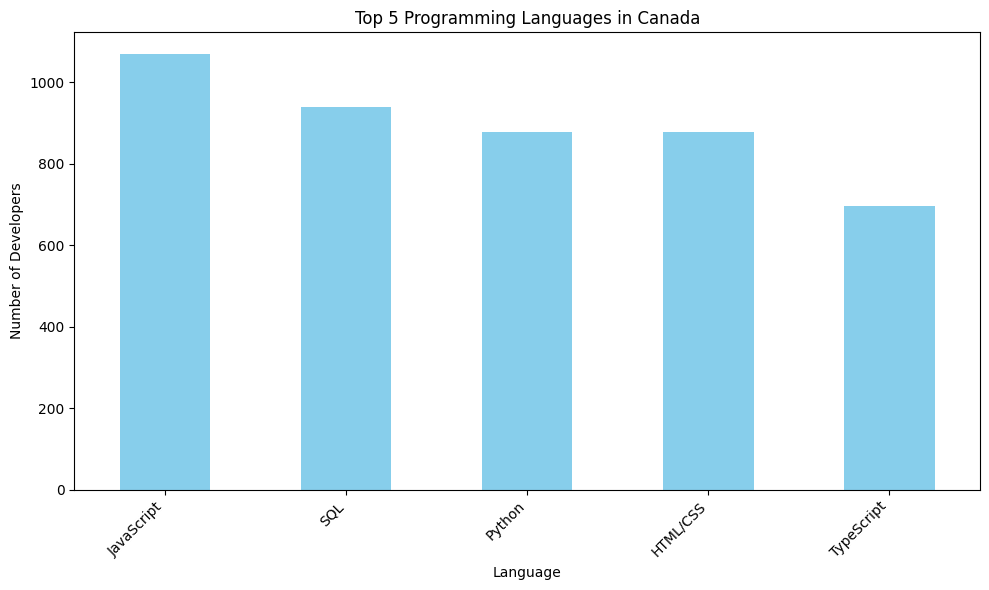

In [14]:
selected_country = 'Canada' # Change this to the desired country
if selected_country in top_languages_by_country:
    plt.figure(figsize=(10, 6))
    top_languages_by_country[selected_country].plot(kind='bar', color='skyblue')
    plt.title(f'Top {len(top_languages_by_country[selected_country])} Programming Languages in {selected_country}')
    plt.xlabel('Language')
    plt.ylabel('Number of Developers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(f"\nNo data available for {selected_country} or country not found.")


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


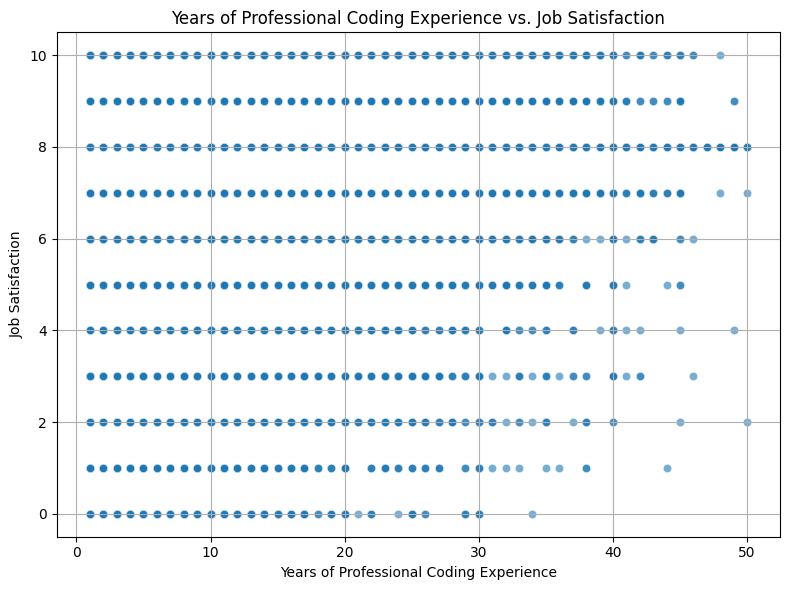


Summary Statistics of YearsCodePro:
count    48704.000000
mean        10.739652
std          8.935175
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro, dtype: float64

Summary Statistics of JobSat:
count    48704.000000
mean         7.408734
std          1.641419
min          0.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64


In [15]:
# 2. Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsCodePro', y='JobSat', data=df, alpha=0.6)  # Added alpha for better visualization
plt.title('Years of Professional Coding Experience vs. Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()
plt.show()

# 3. Print summary statistics.
print("\nSummary Statistics of YearsCodePro:")
print(df['YearsCodePro'].describe())

print("\nSummary Statistics of JobSat:")
print(df['JobSat'].describe())


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [16]:
edlevel_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])
print("\nCross-tabulation of Education Level vs. Employment Type:")
print(edlevel_employment_crosstab)


Cross-tabulation of Education Level vs. Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 974   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      15664   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   10261   
Primary/elementary school                                           133   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1924   
Secondary school (e.g. American high school, Ge...                 1281   
Some college/university study without earning a...                 3286   
Something else                                                      318   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
A

In [18]:
# Clean the 'Employment' column by stripping extra whitespace and standardizing common terms
df['Employment'] = df['Employment'].str.strip().str.replace(r'\s*,\s*', ',', regex=True)

# Get value counts of the 'Employment' column
emp_value_counts = df['Employment'].value_counts()

# Identify employment types with less than 1% frequency
threshold = len(df) * 0.01
infrequent_emp_types = emp_value_counts[emp_value_counts < threshold].index

# Group these infrequent types into 'Other' category
df['Employment'] = df['Employment'].replace(infrequent_emp_types, 'Other')

# Verify the change
print("\nValue Counts of Optimized Employment Column:")
print(df['Employment'].value_counts())


Value Counts of Optimized Employment Column:
Employment
Employed,full-time                                                       33841
Independent contractor,freelancer,or self-employed                        4015
Employed,full-time;Independent contractor,freelancer,or self-employed     3199
Other                                                                     3031
Not employed,but looking for work                                         1158
Employed,part-time                                                         899
Student,full-time                                                          675
Student,full-time;Employed,part-time                                       673
Employed,full-time;Student,part-time                                       650
Employed,full-time;Student,full-time                                       563
Name: count, dtype: int64


/tmp/ipykernel_1633/2266719746.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

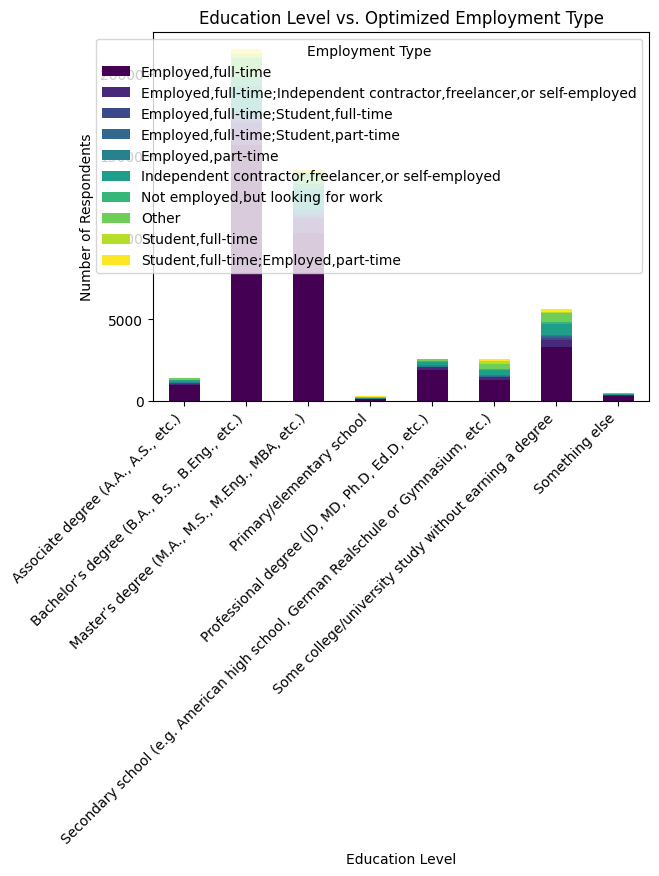

In [20]:
edlevel_employment_crosstab_optimized = pd.crosstab(df['EdLevel'], df['Employment'])

plt.figure(figsize=(12, 6))
edlevel_employment_crosstab_optimized.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Education Level vs. Optimized Employment Type')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
